In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.stats import norm
from scipy.integrate import quad
from math import comb
from scipy.stats import binom
import warnings
warnings.filterwarnings('ignore')

<font color=red><h2> No default & Assumption of independence</h2></font>

In [350]:
# a liste of confidence levels
confidence_levels=[0.5,0.75,0.9,0.95,0.99,0.999]
# we suppose we have 5 grades, with different sample sizes: A=200, B=700, C=500, D=400, E=1000
sample_size=[200,700,500,400,1000]
grades=['P_A','P_B','P_C','P_D','P_E']
columns = pd.MultiIndex.from_tuples([
    ('', 'sample size', ''),       
    ('', 'Probability', ''),       
    ('Confidence level', '50%', ''),
    ('Confidence level', '75%', ''),
    ('Confidence level', '90%', ''),
    ('Confidence level', '95%', ''),
    ('Confidence level', '99%', ''),
    ('Confidence level', '99.9%', '')
])


values=np.full((len(sample_size),1+1+len(confidence_levels)), None)

for i in range(len(values)):
    values[i][0]=sample_size[i]
    values[i][1]=grades[i]
    for j in range(2,len(values[0])):
        values[i][j]="{:.2f}%".format((1-(1-confidence_levels[j-2])**(1/np.sum(sample_size[i:])))*100)

# data_ND_IND contains the values of probabilities of defaults for the differnt grades, under the assumption of (No default & Independence)
data_ND_IND = pd.DataFrame(
    values,
    index=['A','B','C','D','E'],
    columns=columns
)

data_ND_IND


Confidence level                                   
  sample size Probability              50%    75%    90%    95%    99%  99.9%
                                                                             
A         200         P_A            0.02%  0.05%  0.08%  0.11%  0.16%  0.25%
B         700         P_B            0.03%  0.05%  0.09%  0.12%  0.18%  0.27%
C         500         P_C            0.04%  0.07%  0.12%  0.16%  0.24%  0.36%
D         400         P_D            0.05%  0.10%  0.16%  0.21%  0.33%  0.49%
E        1000         P_E            0.07%  0.14%  0.23%  0.30%  0.46%  0.69%

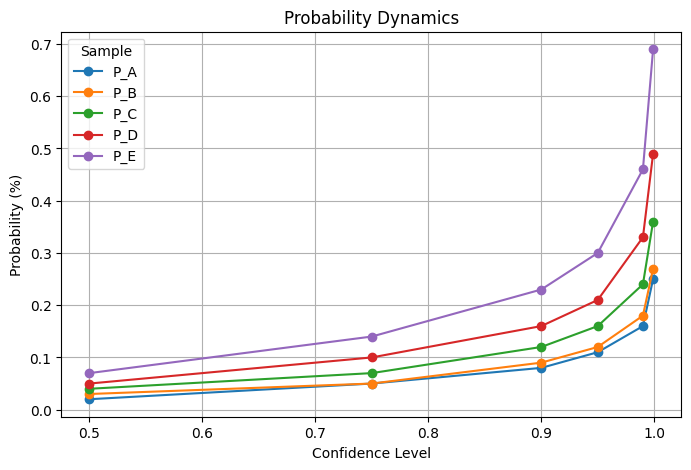

In [351]:
data_prob_ND_IND = data_ND_IND['Confidence level'][['50%','75%','90%','95%','99%','99.9%']].replace('%','', regex=True).astype(float)
plt.figure(figsize=(8,5))
for idx, row in data_prob_ND_IND.iterrows():
    plt.plot(confidence_levels, row, marker='o', label=data_ND_IND[('', 'Probability', '')][idx])
plt.title("Probability Dynamics")
plt.xlabel("Confidence Level")
plt.ylabel("Probability (%)")
plt.legend(title="Sample")
plt.grid(True)
plt.show()

<font color=red><h1> Few defaults & Assumption of independence</h1></font>

In [ ]:
confidence_levels=[0.5,0.75,0.9,0.95,0.99,0.999]
sample_size=[200,700,500,400,1000]
grades=['P_A','P_B','P_C','P_D','P_E']
# We keep the same sample as before; however, we now assume the following number of defaults:
# A = 2, B = 3, C = 1, D = 5, E = 7
defaults=[2,3,1,5,7]
columns = pd.MultiIndex.from_tuples([
    ('', 'sample size', ''),       
    ('', 'Probability', ''),
    ('', '# of defaults', ''),        
    ('Confidence level', '50%', ''),
    ('Confidence level', '75%', ''),
    ('Confidence level', '90%', ''),
    ('Confidence level', '95%', ''),
    ('Confidence level', '99%', ''),
    ('Confidence level', '99.9%', '')
])


values=np.full((len(sample_size),1+1+1+len(confidence_levels)), None)

##########################
def find_proba(n, k, alpha):
    def f(p):
        return binom.cdf(k, n, p) - (1 - alpha)
    return brentq(f, 0, 1)
##########################

for i in range(len(values)):
    values[i][0]=sample_size[i]
    values[i][1]=grades[i]
    values[i][2]=defaults[i]
    for j in range(3,len(values[0])):
        n=np.sum(sample_size[i:])
        k=np.sum(defaults[i:])
        alpha=confidence_levels[j-3]
        values[i][j]="{:.2f}%".format((find_proba(n,k,alpha))*100)


data_FD_IND = pd.DataFrame(
    values,
    index=['A','B','C','D','E'],
    columns=columns
)
data_FD_IND




Confidence level                       \
  sample size Probability # of defaults              50%    75%    90%    95%   
                                                                                
A         200         P_A             2            0.67%  0.78%  0.88%  0.95%   
B         700         P_B             3            0.64%  0.75%  0.86%  0.93%   
C         500         P_C             1            0.72%  0.86%  1.00%  1.09%   
D         400         P_D             5            0.90%  1.09%  1.27%  1.39%   
E        1000         P_E             7            0.77%  0.97%  1.17%  1.31%   

                 
     99%  99.9%  
                 
A  1.09%  1.26%  
B  1.08%  1.25%  
C  1.27%  1.49%  
D  1.62%  1.92%  
E  1.59%  1.95%

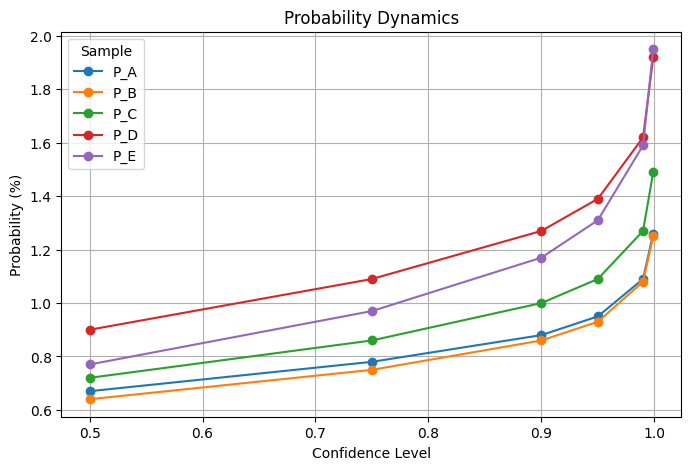

In [353]:
data_prob_FD_IND = data_FD_IND['Confidence level'][['50%','75%','90%','95%','99%','99.9%']].replace('%','', regex=True).astype(float)
plt.figure(figsize=(8,5))
for idx, row in data_prob_FD_IND.iterrows():
    plt.plot(confidence_levels, row, marker='o', label=data_FD_IND[('', 'Probability', '')][idx])
plt.title("Probability Dynamics")
plt.xlabel("Confidence Level")
plt.ylabel("Probability (%)")
plt.legend(title="Sample")
plt.grid(True)
plt.show()

<font color=red><h1>No default & Correlated default events</h1></font>

In [ ]:
confidence_levels=[0.5,0.75,0.9,0.95,0.99,0.999]
sample_size=[200,700,500,400,1000]
grades=['P_A','P_B','P_C','P_D','P_E']
columns = pd.MultiIndex.from_tuples([
    ('', 'sample size', ''),       
    ('', 'Probability', ''),       
    ('Confidence level', '50%', ''),
    ('Confidence level', '75%', ''),
    ('Confidence level', '90%', ''),
    ('Confidence level', '95%', ''),
    ('Confidence level', '99%', ''),
    ('Confidence level', '99.9%', '')
])


values=np.full((len(sample_size),1+1+len(confidence_levels)), None)


###############################
def solve_equa(n, alpha,rho=0.12):
    def integral_value(p):
        f = lambda y: norm.pdf(y) * (
            1 - norm.cdf((norm.ppf(p) - np.sqrt(rho)*y) / np.sqrt(1-rho)))**n
        return quad(f, -np.inf, np.inf)[0]

    f_root = lambda p: integral_value(p) - (1 - alpha)
    return brentq(f_root, 1e-6, 0.5)
###############################"

for i in range(len(values)):
    values[i][0]=sample_size[i]
    values[i][1]=grades[i]
    for j in range(2,len(values[0])):
        n=np.sum(sample_size[i:])
        alpha=confidence_levels[j-2]
        values[i][j]="{:.2f}%".format((solve_equa(n=n,alpha=alpha))*100)


data_ND_CD = pd.DataFrame(
    values,
    index=['A','B','C','D','E'],
    columns=columns
)

data_ND_CD


Confidence level                                   
  sample size Probability              50%    75%    90%    95%    99%  99.9%
                                                                             
A         200         P_A            0.05%  0.14%  0.32%  0.50%  1.08%  2.35%
B         700         P_B            0.05%  0.15%  0.34%  0.53%  1.14%  2.46%
C         500         P_C            0.07%  0.19%  0.43%  0.67%  1.43%  3.02%
D         400         P_D            0.09%  0.25%  0.55%  0.85%  1.78%  3.69%
E        1000         P_E            0.13%  0.33%  0.72%  1.10%  2.27%  4.59%

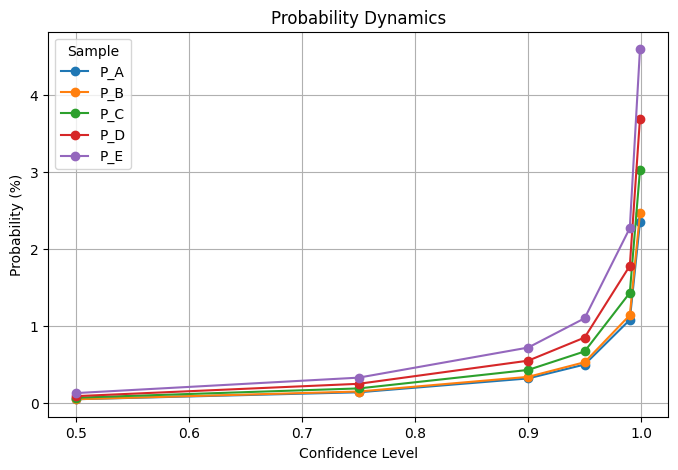

In [355]:
data_prob_ND_CD = data_ND_CD['Confidence level'][['50%','75%','90%','95%','99%','99.9%']].replace('%','', regex=True).astype(float)
plt.figure(figsize=(8,5))
for idx, row in data_prob_ND_CD.iterrows():
    plt.plot(confidence_levels, row, marker='o', label=data_ND_CD[('', 'Probability', '')][idx])
plt.title("Probability Dynamics")
plt.xlabel("Confidence Level")
plt.ylabel("Probability (%)")
plt.legend(title="Sample")
plt.grid(True)
plt.show()

<font color=red><h1>Few defaults & Correlated default events</h1></font>

In [368]:
confidence_levels=[0.5,0.75,0.9,0.95,0.99,0.999]
sample_size=[200,700,500,400,1000]
grades=['P_A','P_B','P_C','P_D','P_E']
defaults=[2,3,1,5,7]
columns = pd.MultiIndex.from_tuples([
    ('', 'sample size', ''),       
    ('', 'Probability', ''),
    ('', '# of defaults', ''),        
    ('Confidence level', '50%', ''),
    ('Confidence level', '75%', ''),
    ('Confidence level', '90%', ''),
    ('Confidence level', '95%', ''),
    ('Confidence level', '99%', ''),
    ('Confidence level', '99.9%', '')
])


values=np.full((len(sample_size),1+1+1+len(confidence_levels)), None)


#######################
def G(p, rho, y):
    return norm.cdf((norm.ppf(p) - np.sqrt(rho) * y) / np.sqrt(1 - rho))


def integrand(y, p, rho, n, k):
    g = G(p, rho, y)

    binom_sum = sum(
        comb(n, i) * g**i * (1 - g)**(n - i)
        for i in range(k + 1)
    )

    return norm.pdf(y) * binom_sum

def integral_value(p, rho, n, k):
    val, _ = quad(integrand, -np.inf, np.inf, args=(p, rho, n, k))
    return val


def solve_pA(n, k, gamma,rho=0.12):
    
    def f(p):
        return integral_value(p, rho, n, k) - (1 - gamma)

    # root search in probability range
    return brentq(f, 1e-6, 0.5)


#######################


for i in range(len(values)):
    values[i][0]=sample_size[i]
    values[i][1]=grades[i]
    values[i][2]=defaults[i]
    for j in range(3,len(values[0])):
        n=np.sum(sample_size[i:])
        k=np.sum(defaults[i:])
        gamma=confidence_levels[j-3]
        values[i][j]="{:.2f}%".format((solve_pA(n,k,gamma))*100)


data_FD_CD = pd.DataFrame(
    values,
    index=['A','B','C','D','E'],
    columns=columns
)
data_FD_CD




Confidence level                       \
  sample size Probability # of defaults              50%    75%    90%    95%   
                                                                                
A         200         P_A             2            1.01%  1.86%  3.08%  4.09%   
B         700         P_B             3            0.97%  1.80%  3.00%  3.99%   
C         500         P_C             1            1.08%  1.98%  3.29%  4.37%   
D         400         P_D             5            1.32%  2.40%  3.93%  5.17%   
E        1000         P_E             7            1.13%  2.11%  3.53%  4.69%   

                  
     99%   99.9%  
                  
A  6.70%  10.98%  
B  6.56%  10.79%  
C  7.13%  11.64%  
D  8.32%  13.35%  
E  7.69%  12.56%

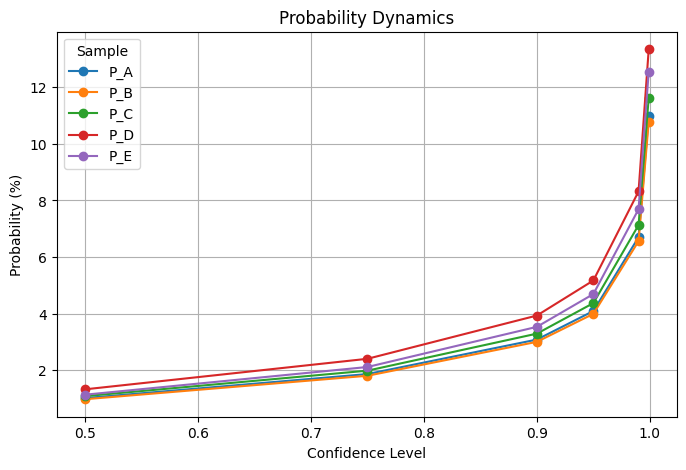

In [369]:
data_prob_FD_CD = data_FD_CD['Confidence level'][['50%','75%','90%','95%','99%','99.9%']].replace('%','', regex=True).astype(float)
plt.figure(figsize=(8,5))
for idx, row in data_prob_FD_CD.iterrows():
    plt.plot(confidence_levels, row, marker='o', label=data_FD_CD[('', 'Probability', '')][idx])
plt.title("Probability Dynamics")
plt.xlabel("Confidence Level")
plt.ylabel("Probability (%)")
plt.legend(title="Sample")
plt.grid(True)
plt.show()

<font color=red><h1>Cailbration by scaling factors</h1></font>

In [370]:
# We use the previous probabilities stored in data_FD_CD; however, you can simply replace
# data_FD_CD in the code with any other probability tables defined above.
columns = pd.MultiIndex.from_tuples([       
    ('Confidence level', '50%', ''),
    ('Confidence level', '75%', ''),
    ('Confidence level', '90%', ''),
    ('Confidence level', '95%', ''),
    ('Confidence level', '99%', ''),
    ('Confidence level', '99.9%', '')
])
values=np.full((2,len(confidence_levels)), None)
calibration_parameters=pd.DataFrame(
    values,
    columns=columns,
    index=['Upper bound for portfolio PD','K']
)
calibration_parameters.iloc[0]=data_FD_CD['Confidence level'][['50%','75%','90%','95%','99%','99.9%']].loc['A'].values

# The code below computes the scaling factor k for different confidence levels.
for i in range(len(confidence_levels)):
    col=f"{confidence_levels[i]*100:g}%"
    a=(np.sum(data_FD_CD[('', 'sample size')]*data_FD_CD['Confidence level'][col].replace('%','', regex=True).astype(float)))/np.sum(sample_size)
    k=calibration_parameters.iloc[0]['Confidence level'][col].replace('%','', regex=True).astype(float)[0]/a
    calibration_parameters['Confidence level'].iloc[1,i]="{:.2f}".format(k)


# The code below computes the scaled PD (PD_scaled = k × PD).
for i in range(len(confidence_levels)):
    col=f"{confidence_levels[i]*100:g}%"
    K=float(calibration_parameters['Confidence level'].iloc[1,i])
    data_FD_CD.loc[:, ('Confidence level', col)]=(K*data_FD_CD['Confidence level'][col].replace('%','', regex=True).astype(float)/100).apply(lambda x: "{:.2f}%".format(x*100))
data_FD_CD.rename(columns={'Probability': 'Scaled probability'})


Confidence level                \
  sample size Scaled probability # of defaults              50%    75%    90%   
                                                                                
A         200                P_A             2            0.93%  1.69%  2.80%   
B         700                P_B             3            0.89%  1.64%  2.73%   
C         500                P_C             1            0.99%  1.80%  2.99%   
D         400                P_D             5            1.21%  2.18%  3.58%   
E        1000                P_E             7            1.04%  1.92%  3.21%   

                         
     95%    99%   99.9%  
                         
A  3.72%  6.10%  10.10%  
B  3.63%  5.97%   9.93%  
C  3.98%  6.49%  10.71%  
D  4.70%  7.57%  12.28%  
E  4.27%  7.00%  11.56%

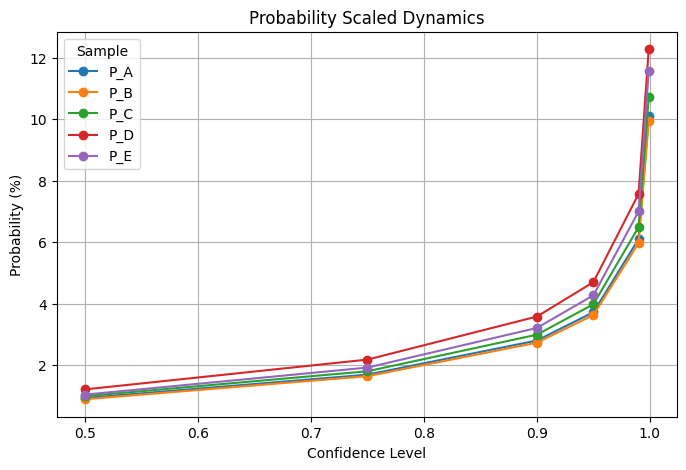

In [365]:
data_prob_scaled = data_FD_CD['Confidence level'][['50%','75%','90%','95%','99%','99.9%']].replace('%','', regex=True).astype(float)
plt.figure(figsize=(8,5))
for idx, row in data_prob_scaled.iterrows():
    plt.plot(confidence_levels, row, marker='o', label=data_FD_CD[('', 'Probability', '')][idx])
plt.title("Probability Scaled Dynamics")
plt.xlabel("Confidence Level")
plt.ylabel("Probability (%)")
plt.legend(title="Sample")
plt.grid(True)
plt.show()